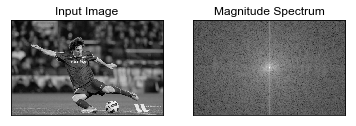

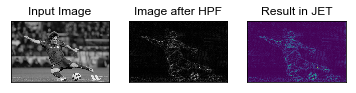

In [2]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/Users/ylshan/Documents/python/视觉/图像处理图片/messi5.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# 这里构建振幅图的公式没学过
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
#我们可以看到输出结果的中心部分更白(亮)，这说明低频分量更多。
#现在我们可以进行频域变换了，我们就可以在频域对图像进行一些操 作了，例如高通滤波和重建图像(DFT 的逆变换)。
#比如我们可以使用一个 60x60 的矩形窗口对图像进行掩模操作从而去除低频分量。
#然后再使用函数 np.fft.ifftshift() 进行逆平移操作，所以现在直流分量又回到左上角了，左 后使用函数 np.ifft2() 进行 FFT 逆变换。
#同样又得到一堆复杂的数字，我们 可以对他们取绝对值:

rows, cols = img.shape
crow,ccol = rows//2 , cols//2 
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0 
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
# 取绝对值
img_back = np.abs(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

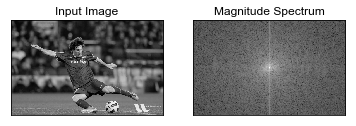

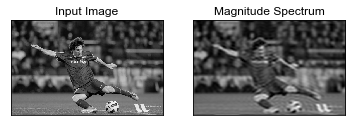

In [5]:
#OpenCV 中相应的函数是 cv2.dft() 和 cv2.idft()。和前面输出的结果 一样，但是是双通道的。
#第一个通道是结果的实数部分，第二个通道是结果的 虚数部分。
#输入图像要首先转换成 np.float32 格式。

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/Users/ylshan/Documents/python/视觉/图像处理图片/messi5.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#现在我们来做逆 DFT。在前面的部分我们实现了一个 HPF(高通滤波)， 现在我们来做 LPF(低通滤波)将高频部分去除。
#其实就是对图像进行模糊操 作。
#首先我们需要构建一个掩模，与低频区域对应的地方设置为 1, 与高频区域 对应的地方设置为 0。

rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()